# Lab 4.06 - Bivariate Analysis of Qualitative Data


In [191]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
from scipy.special import binom # binomial-function

## Exercise 6 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

Read the dataset

In [192]:

df = pd.read_csv('../data/MuziekWijn.csv')

Give the names of both columns. What is wrong?

In [193]:
 
df.columns

Index(['Muziek', ' Wijn'], dtype='object')

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

In [194]:
df = df.rename(columns={' Wijn': 'Wijn'})

1. Set up the correct crosstab.

In [195]:
observed = pd.crosstab(df['Wijn'], df['Muziek'],margins=True)
observed

Muziek,Franse,Geen,Italiaanse,All
Wijn,,,,
Andere,35,43,35,113
Franse,39,30,30,99
Italiaanse,1,11,19,31
All,75,84,84,243


2. Determine the marginal totals.

3. Determine the expected results.

In [196]:
 
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = .05 

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print(expected)
print(observed)

[[ 34.87654321  39.0617284   39.0617284  113.        ]
 [ 30.55555556  34.22222222  34.22222222  99.        ]
 [  9.56790123  10.71604938  10.71604938  31.        ]
 [ 75.          84.          84.         243.        ]]
Muziek       Franse  Geen  Italiaanse  All
Wijn                                      
 Andere          35    43          35  113
 Franse          39    30          30   99
 Italiaanse       1    11          19   31
All              75    84          84  243


4. Calculate the χ² test statistic.

In [197]:
print("Critical value     : %.4f" % g)
print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Critical value     : 16.9190
Chi-squared       : 18.2792
Degrees of freedom: 9
P-value           : 0.0321


5. Calculate Cramér's V. What can you conclude from this?

In [198]:
dof = min(observed.shape) - 1
n = observed.sum(axis=1).sum()
cramers_v = np.sqrt(chi2 / (dof * n))
print(cramers_v)

0.07917443434001602


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

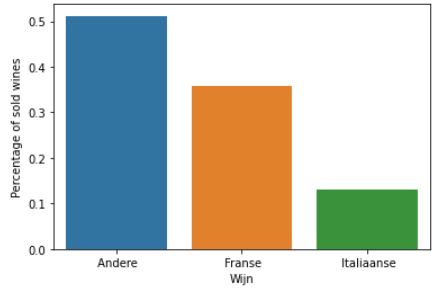

<Axes: xlabel='Wijn'>

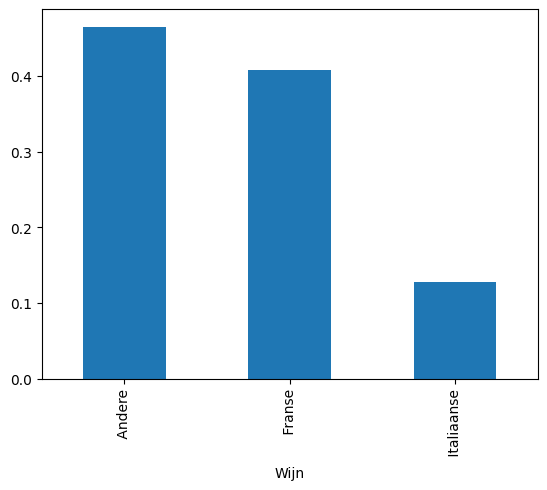

In [209]:
wine_counts = df['Wijn'].value_counts()
wine_percentages = (wine_counts / wine_counts.sum())
sns.barplot(wine_percentages)

plt.xlabel('Wine Type')
plt.ylabel('Percentage of Occurrences') 

(wine_counts / wine_counts.sum()).plot(kind='bar', stacked=True)


<Axes: xlabel='Muziek'>

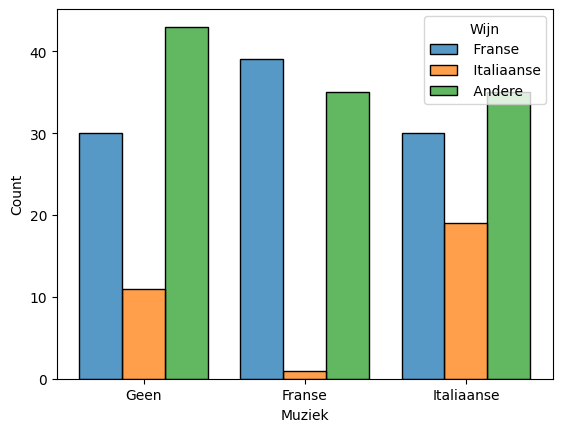

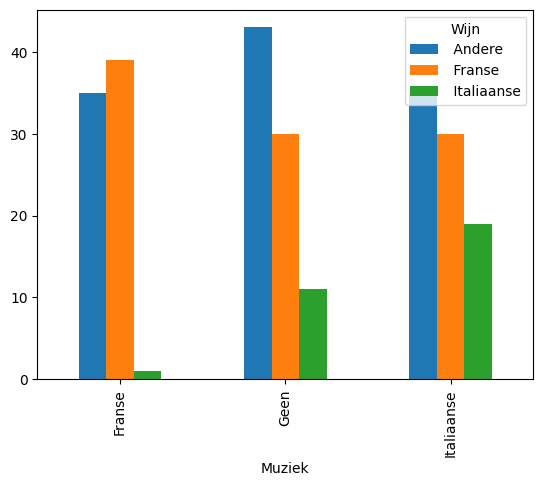

In [207]:
 
sns.histplot(data=df, x="Muziek", hue="Wijn", multiple="dodge", shrink=.8)
observed.plot(kind='bar', stacked=False)

Plot a clustered bar chart of the dataset  

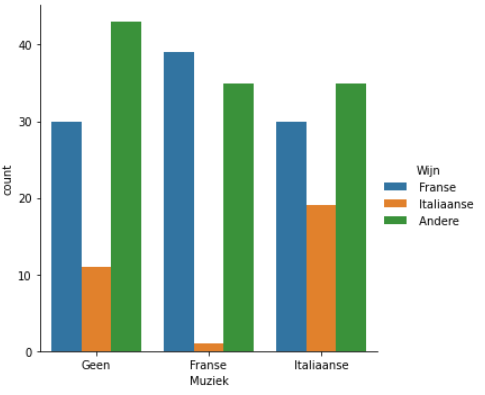

<Axes: xlabel='Muziek'>

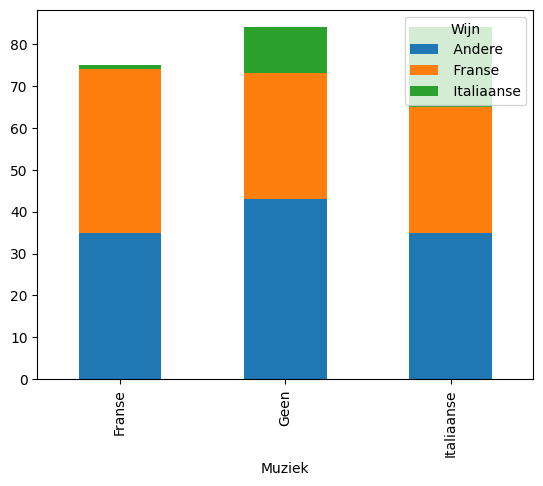

In [204]:
observed = pd.crosstab(df['Muziek'], df['Wijn'])

# Horizontally oriented stacked bar chart
observed.plot(kind='bar', stacked=True)

Plot a bar chart (stacked bar chart) of the dataset

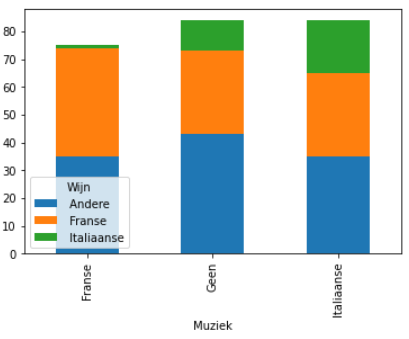